### The top 50 highest-grossing movies in France during the year 2018

##### 1) Data cleaning and wrangling

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [5]:
# import the data from the web as a dataframe
url='https://en.wikipedia.org/wiki/List_of_2018_box_office_number-one_films_in_France'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [6]:
# Exmine first 5 methods
df.head()

,#,Date,Film,Gross,Notes
0,1,"January 7, 2018",Star Wars: The Last Jedi,"US$6,557,062",[1]
1,2,"January 14, 2018",Jumanji: Welcome to the Jungle,"US$2,127,871",[2]
2,3,"January 21, 2018",Brillantissime,"US$2,006,033",[3]
3,4,"January 28, 2018",The Post,"US$2,771,269",[4]
4,5,"February 4, 2018",Les Tuche 3,"US$16,604,101",[5]


In [7]:
# Getting data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       50 non-null     int64 
 1   Date    50 non-null     object
 2   Film    50 non-null     object
 3   Gross   50 non-null     object
 4   Notes   50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [8]:
# Remove unnessary characters in Gross column since it is not numeric
df['Gross'] = df['Gross'].str.replace(r'US\$','').str.replace(r',','')

C:\Users\Islam.Mammadov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
# Change the data type of this column
df['Gross']=df['Gross'].astype('int64')

In [15]:
# Checking data types and first 5 rows of Gross column
df['Gross'].head()

0     6557062
1     2127871
2     2006033
3     2771269
4    16604101
Name: Gross, dtype: int64

In [16]:
# Change the Date column data type to date time
df['Date']=df['Date'].astype('datetime64')
# Another way df['Date'] = pd.to_datetime(df['Date'])
# Create a new column for the month
df['Month']=pd.DatetimeIndex(df['Date']).month

In [18]:
# Remove unnessary columns # and notes
df.drop(['#','Notes'], axis =1, inplace=True)

##### 2) Visualization and Data Exploration

In [73]:
# Summary statistics
df.groupby('Month').Gross.agg(["min", "max", "median", "mean", "sum", "count"])

,min,max,median,mean,sum,count
Month,,,,,,
1,2006033,6557062,2449570.0,3365558.75,13462235,4
2,5637555,16604101,8190295.0,9655561.50,38622246,4
3,3073866,16739183,7412487.5,8659506.00,34638024,4
4,3140585,17645304,5484062.0,8189580.40,40947902,5
5,4015319,8836807,6582720.5,6504391.75,26017567,4
6,2520159,9579503,3780941.5,4915386.25,19661545,4
7,1740016,9454086,4859634.0,5027310.60,25136553,5
8,2873390,8193447,4432109.0,4982763.75,19931055,4
9,1414632,4425722,2254244.0,2566118.40,12830592,5


In [30]:
# Create a subset from the data with Film and Gross columns and sorting descendent order to plot top 5 movies
df1=df[['Film', 'Gross']].sort_values(ascending = False, by = 'Gross')

In [34]:
# Resetting index
df1.reset_index(drop=True, inplace=True)

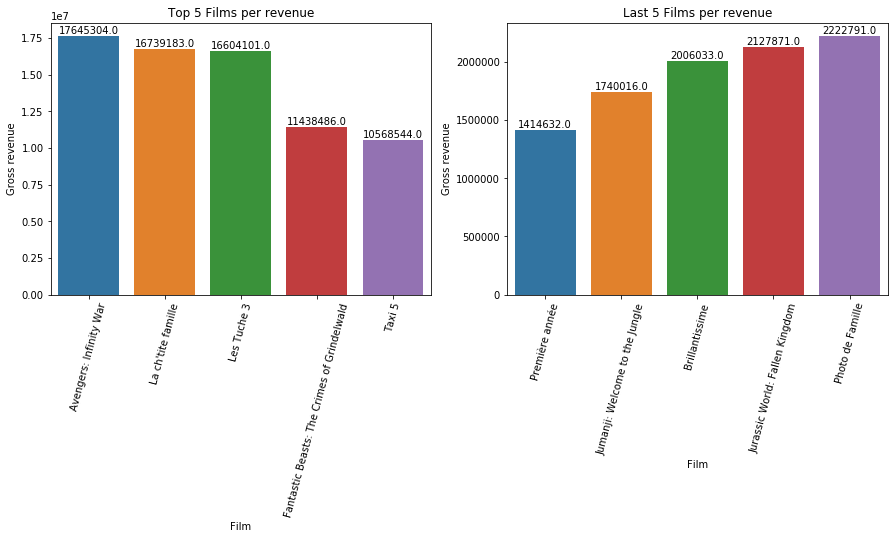

In [59]:
# Show top 5 films
# setting the figure size
fig = plt.figure(12,figsize =(15,5))
ax1=fig.add_subplot(121)
# creating a bar plot
ax1 = sns.barplot(x='Film', y='Gross', data=df1.head(5))
# rotate x axis label
ax1.set_xticklabels(labels =df1['Film'].head(5), rotation=75)
# setting the title
ax1.set_title('Top 5 Films per revenue')
# setting the Y-axis labes
ax1.set_ylabel('Gross revenue')
# labelling the bars in the bar graph
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+ p.get_width()/2,p.get_height()), ha='center', va ='bottom')


ax2=fig.add_subplot(122)
# creating a bar plot
ax2 = sns.barplot(x='Film', y='Gross', data=df1.tail(5).sort_values(ascending = True, by ='Gross'))
# rotate x axis label
ax2.set_xticklabels(labels =df1['Film'].tail(5), rotation=75)
# setting the title
ax2.set_title('Last 5 Films per revenue')
# setting the Y-axis labes
ax2.set_ylabel('Gross revenue')
# labelling the bars in the bar graph
for i in ax2.patches:
    ax2.annotate(i.get_height(), (i.get_x()+ i.get_width()/2,i.get_height()), ha='center', va='bottom')


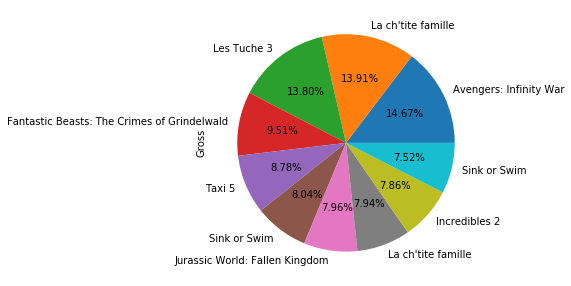

In [60]:
# Create pie chart showing the top 10 films by revenue
df1['Gross'].head(10).plot(kind = 'pie', autopct = '%.2f%%', labels = df1['Film'], figsize = (10,5))

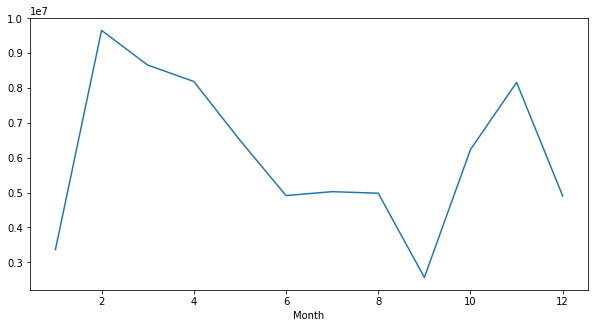

In [65]:
# Agrregate the revenues per month
df_agg= df.groupby('Month')['Gross'].mean()
# Create a line plot
df_agg.plot(kind='line', figsize=(10,5))

In [77]:
# Checking the month with lowest Gross
df.query('Month==9')

,Date,Film,Gross,Month
34,2018-09-02,The Meg,2513203,9
35,2018-09-09,Photo de Famille,1414632,9
36,2018-09-16,Première année,2222791,9
37,2018-09-23,The Nun,4425722,9
38,2018-09-30,The Nun,2254244,9


In conclusion, the top 3 moves by revenues are Avengers-Infinity war, La ch'tite family. Les Tuche 3. When We look at across the month, movie revenues peaked on February. However, Septemper is the worth month although. the number of movies released on that month are among the highest